In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EVENT DATE 

In [2]:
df = pd.read_csv('AviationData.csv',encoding = "Latin-1", low_memory=False)

In [3]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df = df[df['Country'] == 'United States']

In [5]:
df.describe(include=object)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,82248,82248,82248,82248,82237,82248,32265,32255,49189,51654,...,82227,79225,28225,10297,79819,14495,81603,61158,79637,69567
unique,81355,2,82230,14609,23030,1,23653,25168,9634,23896,...,2,12,28,3,26,11954,4,12,16974,2037
top,20001214X45071,Accident,CEN22LA149,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,UNK,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,79906,2,25,434,82248,19,24,1475,239,...,73906,68507,18128,3848,48544,252,75317,15365,61189,15416


In [6]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     11
Country                       0
Latitude                  49983
Longitude                 49993
Airport.Code              33059
Airport.Name              30594
Injury.Severity             108
Aircraft.damage            1979
Aircraft.Category         54094
Registration.Number          51
Make                         21
Model                        38
Amateur.Built                21
Number.of.Engines          1875
Engine.Type                3023
FAR.Description           54023
Schedule                  71951
Purpose.of.flight          2429
Air.carrier               67753
Total.Fatal.Injuries      10654
Total.Serious.Injuries    11375
Total.Minor.Injuries      10729
Total.Uninjured            5005
Weather.Condition           645
Broad.phase.of.flight     21090
Report.Status              2611
Publication.Date          12681
dtype: i

In [7]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

C:\Users\chone\AppData\Local\Temp\ipykernel_13984\1198437970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event.Date'] = pd.to_datetime(df['Event.Date'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82248 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                82248 non-null  object        
 1   Investigation.Type      82248 non-null  object        
 2   Accident.Number         82248 non-null  object        
 3   Event.Date              82248 non-null  datetime64[ns]
 4   Location                82237 non-null  object        
 5   Country                 82248 non-null  object        
 6   Latitude                32265 non-null  object        
 7   Longitude               32255 non-null  object        
 8   Airport.Code            49189 non-null  object        
 9   Airport.Name            51654 non-null  object        
 10  Injury.Severity         82140 non-null  object        
 11  Aircraft.damage         80269 non-null  object        
 12  Aircraft.Category       28154 non-null  object

In [30]:
#checking if other countries were deleted
unique_countries = df['Country'].unique()


print(unique_countries)

['United States']


In [31]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 9 to 88536
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                3019 non-null   object        
 1   Investigation.Type      3019 non-null   object        
 2   Accident.Number         3019 non-null   object        
 3   Event.Date              3019 non-null   datetime64[ns]
 4   Location                3008 non-null   object        
 5   Country                 3019 non-null   object        
 6   Latitude                594 non-null    object        
 7   Longitude               591 non-null    object        
 8   Airport.Code            2141 non-null   object        
 9   Airport.Name            2247 non-null   object        
 10  Injury.Severity         3019 non-null   object        
 11  Aircraft.damage         2779 non-null   object        
 12  Aircraft.Category       415 non-null    object 

C:\Users\chone\AppData\Local\Temp\ipykernel_13984\1198437970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event.Date'] = pd.to_datetime(df['Event.Date'])


In [32]:
df = df.copy()
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Name.Abbr'] = df['Event.Date'].dt.day_name().str[:3]

df.loc[(df['Day.Name.Abbr'] == 'Sat') | (df['Day.Name.Abbr'] == 'Sun'), 'Weekend'] = True
df.loc[(df['Day.Name.Abbr'] != 'Sat') & (df['Day.Name.Abbr'] != 'Sun'), 'Weekend'] = False

In [33]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,IMC,Cruise,Probable Cause,01-01-1982,1982,Jan,Fri,False,JACKSONVILLE,FL
19,20020917X02339,Accident,MIA82DA028,1982-01-02,"MIAMI, FL",United States,NaN,NaN,NaN,NaN,...,VMC,Cruise,Probable Cause,02-01-1983,1982,Jan,Sat,True,MIAMI,FL
30,20020917X01992,Accident,FTW82DA036,1982-01-03,"FORT WORTH, TX",United States,NaN,NaN,NaN,OAK GROVE,...,VMC,Approach,Probable Cause,03-01-1983,1982,Jan,Sun,True,FORT WORTH,TX
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,NaN,NaN,ORD,CHICAGO O'HARE INTER'L,...,UNK,Cruise,Probable Cause,12-01-1983,1982,Jan,Tue,False,CHICAGO,IL
105,20020917X01624,Accident,ANC82DA014,1982-01-17,"ANCHORAGE, AK",United States,NaN,NaN,MRI,MERRILL FIELD,...,VMC,Takeoff,Probable Cause,17-01-1983,1982,Jan,Sun,True,ANCHORAGE,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87812,20220517105094,Accident,ANC22LA033,2022-05-17,"Anchorage, AK",United States,612333N,1494939W,Z40,Goose Bay,...,VMC,NaN,A loss of engine power for reasons that could ...,01-09-2022,2022,May,Tue,False,Anchorage,AK
87953,20220621105296,Accident,ANC22LA044,2022-06-09,"Anchorage, AK",United States,061153N,1494912W,PAED,Elmendorf Air Force Base,...,VMC,NaN,The pilots improper landing flare which resul...,01-09-2022,2022,Jun,Thu,False,Anchorage,AK
88244,20220802105639,Accident,ANC22LA063,2022-07-26,"Anchorage, AK",United States,611047N,1495749W,LHD,LAKE HOOD,...,VMC,NaN,The pilots failure to maintain directional co...,02-12-2022,2022,Jul,Tue,False,Anchorage,AK
88254,20220728105601,Accident,ANC22LA062,2022-07-28,"Anchorage, AK",United States,611257N,1495030W,MRI,MERRILL FLD,...,VMC,NaN,The pilots failure to maintain directional co...,02-12-2022,2022,Jul,Thu,False,Anchorage,AK


In [34]:
# Number of accidents per year
accidents_per_year = df.groupby(['Year'], as_index = False)['Event.Id'].count()
accidents_per_year

,Year,Event.Id
0,1982,151
1,1983,166
2,1984,170
3,1985,121
4,1986,138
5,1987,154
6,1988,143
7,1989,146
8,1990,114
9,1991,102


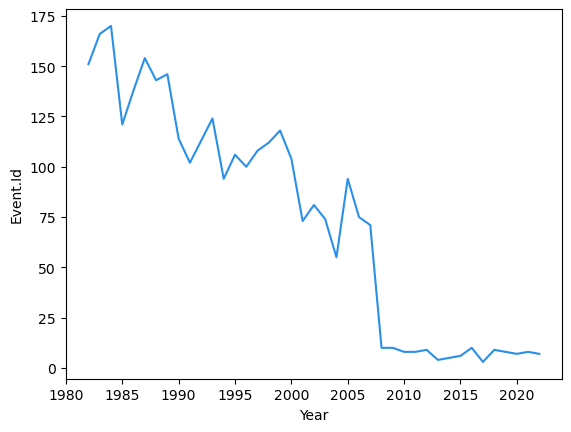

In [35]:
plot = sns.lineplot(x = 'Year', y = 'Event.Id', data = accidents_per_year, color = '#2990EA')

In [36]:
# Removing data before 1982
df = df[df['Year'] >= 1982]

In [37]:
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,IMC,Cruise,Probable Cause,01-01-1982,1982,Jan,Fri,False,JACKSONVILLE,FL
19,20020917X02339,Accident,MIA82DA028,1982-01-02,"MIAMI, FL",United States,NaN,NaN,NaN,NaN,...,VMC,Cruise,Probable Cause,02-01-1983,1982,Jan,Sat,True,MIAMI,FL
30,20020917X01992,Accident,FTW82DA036,1982-01-03,"FORT WORTH, TX",United States,NaN,NaN,NaN,OAK GROVE,...,VMC,Approach,Probable Cause,03-01-1983,1982,Jan,Sun,True,FORT WORTH,TX
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,NaN,NaN,ORD,CHICAGO O'HARE INTER'L,...,UNK,Cruise,Probable Cause,12-01-1983,1982,Jan,Tue,False,CHICAGO,IL
105,20020917X01624,Accident,ANC82DA014,1982-01-17,"ANCHORAGE, AK",United States,NaN,NaN,MRI,MERRILL FIELD,...,VMC,Takeoff,Probable Cause,17-01-1983,1982,Jan,Sun,True,ANCHORAGE,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87812,20220517105094,Accident,ANC22LA033,2022-05-17,"Anchorage, AK",United States,612333N,1494939W,Z40,Goose Bay,...,VMC,NaN,A loss of engine power for reasons that could ...,01-09-2022,2022,May,Tue,False,Anchorage,AK
87953,20220621105296,Accident,ANC22LA044,2022-06-09,"Anchorage, AK",United States,061153N,1494912W,PAED,Elmendorf Air Force Base,...,VMC,NaN,The pilots improper landing flare which resul...,01-09-2022,2022,Jun,Thu,False,Anchorage,AK
88244,20220802105639,Accident,ANC22LA063,2022-07-26,"Anchorage, AK",United States,611047N,1495749W,LHD,LAKE HOOD,...,VMC,NaN,The pilots failure to maintain directional co...,02-12-2022,2022,Jul,Tue,False,Anchorage,AK
88254,20220728105601,Accident,ANC22LA062,2022-07-28,"Anchorage, AK",United States,611257N,1495030W,MRI,MERRILL FLD,...,VMC,NaN,The pilots failure to maintain directional co...,02-12-2022,2022,Jul,Thu,False,Anchorage,AK


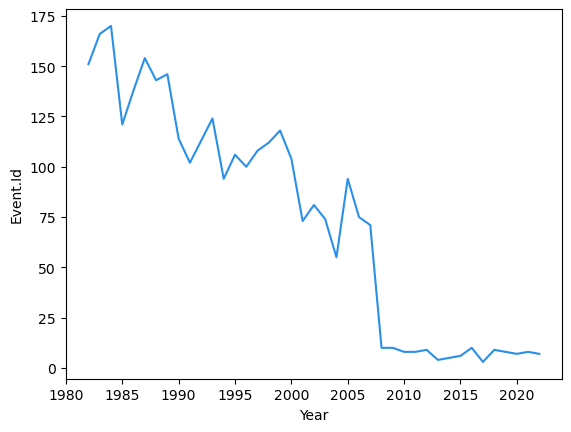

In [38]:
filtered_data = accidents_per_year[(accidents_per_year['Year'] >= 1980) & (accidents_per_year['Year'] <= 2022)]

#Creating graph
plot = sns.lineplot(x='Year', y='Event.Id', data=filtered_data, color='#2990EA')

plt.show()

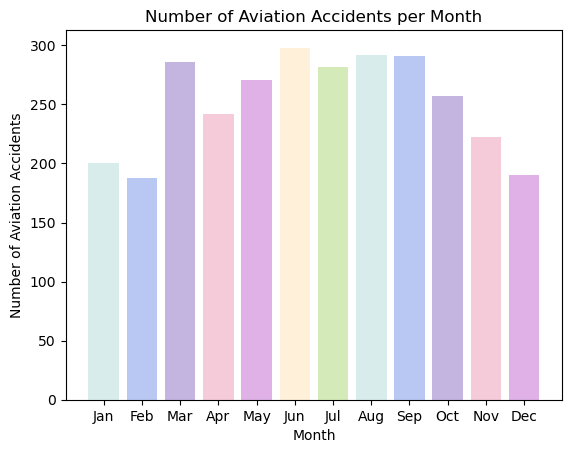

In [39]:
# Months with the most accidents

colors = ['#D9ECEC', '#B9C8F3', '#C3B4E0', '#F5CAD9', '#DFB1E6', '#FFF0D9', '#D4EBB9']

month_order = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
accidents_per_month = df['Month.Abbr'].value_counts().loc[month_order]

plt.bar(accidents_per_month.index, accidents_per_month, color= colors)

plt.xlabel('Month')
plt.ylabel('Number of Aviation Accidents')
plt.title('Number of Aviation Accidents per Month')


plt.show()

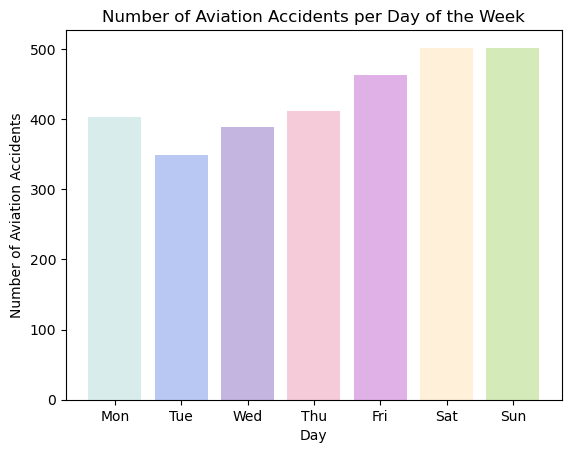

In [40]:
# Days with the most accidents

colors = ['#D9ECEC', '#B9C8F3', '#C3B4E0', '#F5CAD9', '#DFB1E6', '#FFF0D9', '#D4EBB9']  


# Days with the most accidents
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
accidents_per_day = df['Day.Name.Abbr'].value_counts().loc[day_order]

plt.bar(accidents_per_day.index, accidents_per_day, color = colors)

plt.xlabel('Day')
plt.ylabel('Number of Aviation Accidents')
plt.title('Number of Aviation Accidents per Day of the Week')


plt.show()

In [41]:
# Number of accidents per year <1982
accidents_per_year = df.groupby(['Year'], as_index = False)['Event.Id'].count()
accidents_per_year

,Year,Event.Id
0,1982,151
1,1983,166
2,1984,170
3,1985,121
4,1986,138
5,1987,154
6,1988,143
7,1989,146
8,1990,114
9,1991,102


# LOCATION

In [42]:
df = df[df['Country'] == 'United States']

In [43]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,IMC,Cruise,Probable Cause,01-01-1982,1982,Jan,Fri,False,JACKSONVILLE,FL
19,20020917X02339,Accident,MIA82DA028,1982-01-02,"MIAMI, FL",United States,NaN,NaN,NaN,NaN,...,VMC,Cruise,Probable Cause,02-01-1983,1982,Jan,Sat,True,MIAMI,FL
30,20020917X01992,Accident,FTW82DA036,1982-01-03,"FORT WORTH, TX",United States,NaN,NaN,NaN,OAK GROVE,...,VMC,Approach,Probable Cause,03-01-1983,1982,Jan,Sun,True,FORT WORTH,TX
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,NaN,NaN,ORD,CHICAGO O'HARE INTER'L,...,UNK,Cruise,Probable Cause,12-01-1983,1982,Jan,Tue,False,CHICAGO,IL
105,20020917X01624,Accident,ANC82DA014,1982-01-17,"ANCHORAGE, AK",United States,NaN,NaN,MRI,MERRILL FIELD,...,VMC,Takeoff,Probable Cause,17-01-1983,1982,Jan,Sun,True,ANCHORAGE,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87812,20220517105094,Accident,ANC22LA033,2022-05-17,"Anchorage, AK",United States,612333N,1494939W,Z40,Goose Bay,...,VMC,NaN,A loss of engine power for reasons that could ...,01-09-2022,2022,May,Tue,False,Anchorage,AK
87953,20220621105296,Accident,ANC22LA044,2022-06-09,"Anchorage, AK",United States,061153N,1494912W,PAED,Elmendorf Air Force Base,...,VMC,NaN,The pilots improper landing flare which resul...,01-09-2022,2022,Jun,Thu,False,Anchorage,AK
88244,20220802105639,Accident,ANC22LA063,2022-07-26,"Anchorage, AK",United States,611047N,1495749W,LHD,LAKE HOOD,...,VMC,NaN,The pilots failure to maintain directional co...,02-12-2022,2022,Jul,Tue,False,Anchorage,AK
88254,20220728105601,Accident,ANC22LA062,2022-07-28,"Anchorage, AK",United States,611257N,1495030W,MRI,MERRILL FLD,...,VMC,NaN,The pilots failure to maintain directional co...,02-12-2022,2022,Jul,Thu,False,Anchorage,AK


In [44]:
print(df['Location'])

9        JACKSONVILLE, FL
19              MIAMI, FL
30         FORT WORTH, TX
79            CHICAGO, IL
105         ANCHORAGE, AK
               ...       
87812       Anchorage, AK
87953       Anchorage, AK
88244       Anchorage, AK
88254       Anchorage, AK
88536       Anchorage, AK
Name: Location, Length: 3019, dtype: object


In [45]:
missing_locations = df['Location'].isnull().sum()
print("Number of missing locations:", missing_locations)

Number of missing locations: 11


In [46]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,IMC,Cruise,Probable Cause,01-01-1982,1982,Jan,Fri,False,JACKSONVILLE,FL
19,20020917X02339,Accident,MIA82DA028,1982-01-02,"MIAMI, FL",United States,NaN,NaN,NaN,NaN,...,VMC,Cruise,Probable Cause,02-01-1983,1982,Jan,Sat,True,MIAMI,FL
30,20020917X01992,Accident,FTW82DA036,1982-01-03,"FORT WORTH, TX",United States,NaN,NaN,NaN,OAK GROVE,...,VMC,Approach,Probable Cause,03-01-1983,1982,Jan,Sun,True,FORT WORTH,TX
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,NaN,NaN,ORD,CHICAGO O'HARE INTER'L,...,UNK,Cruise,Probable Cause,12-01-1983,1982,Jan,Tue,False,CHICAGO,IL
105,20020917X01624,Accident,ANC82DA014,1982-01-17,"ANCHORAGE, AK",United States,NaN,NaN,MRI,MERRILL FIELD,...,VMC,Takeoff,Probable Cause,17-01-1983,1982,Jan,Sun,True,ANCHORAGE,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87812,20220517105094,Accident,ANC22LA033,2022-05-17,"Anchorage, AK",United States,612333N,1494939W,Z40,Goose Bay,...,VMC,NaN,A loss of engine power for reasons that could ...,01-09-2022,2022,May,Tue,False,Anchorage,AK
87953,20220621105296,Accident,ANC22LA044,2022-06-09,"Anchorage, AK",United States,061153N,1494912W,PAED,Elmendorf Air Force Base,...,VMC,NaN,The pilots improper landing flare which resul...,01-09-2022,2022,Jun,Thu,False,Anchorage,AK
88244,20220802105639,Accident,ANC22LA063,2022-07-26,"Anchorage, AK",United States,611047N,1495749W,LHD,LAKE HOOD,...,VMC,NaN,The pilots failure to maintain directional co...,02-12-2022,2022,Jul,Tue,False,Anchorage,AK
88254,20220728105601,Accident,ANC22LA062,2022-07-28,"Anchorage, AK",United States,611257N,1495030W,MRI,MERRILL FLD,...,VMC,NaN,The pilots failure to maintain directional co...,02-12-2022,2022,Jul,Thu,False,Anchorage,AK


In [47]:
df = df.copy()
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
df[['City', 'State']].head(10)

,City,State
9,JACKSONVILLE,FL
19,MIAMI,FL
30,FORT WORTH,TX
79,CHICAGO,IL
105,ANCHORAGE,AK
129,MIAMI,FL
135,ORLANDO,FL
164,HOUSTON,TX
171,ANCHORAGE,AK
191,ATLANTA,GA


In [48]:
#ex. dataframe
df1 = pd.DataFrame(df)

# Get the count of each value
value_counts = df['Location'].value_counts()

# Select the values where the count is less than 50
to_remove = value_counts[value_counts <= 100].index

# Keep rows where the city column is not in to_remove
df = df1[~df1.Location.isin(to_remove)]

pd.DataFrame(df["Location"].value_counts())

,Location
"ANCHORAGE, AK",434
"MIAMI, FL",200
"ALBUQUERQUE, NM",196
"HOUSTON, TX",193
"CHICAGO, IL",184
"FAIRBANKS, AK",174
"TUCSON, AZ",142
"PHOENIX, AZ",132
"ORLANDO, FL",132
"ENGLEWOOD, CO",131


In [49]:
empty_locations = df[df['Location'].isnull()]

In [50]:
empty_locations = df[df['Location'].isna()]

In [51]:
empty_locations

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State
4239,20001214X42513,Accident,LAX83LAMS4,1983-03-29,NaN,United States,NaN,NaN,NaN,NaN,...,VMC,Unknown,Probable Cause,NaN,1983,Mar,Tue,False,NaN,NaN
10546,20001214X41859,Accident,MIA85LAMS1,1984-12-23,NaN,United States,NaN,NaN,NaN,NaN,...,IMC,Unknown,Probable Cause,NaN,1984,Dec,Sun,True,NaN,NaN
12527,20001214X37399,Accident,CHI85FAMS3,1985-08-03,NaN,United States,NaN,NaN,NaN,NaN,...,UNK,Unknown,Probable Cause,NaN,1985,Aug,Sat,True,NaN,NaN
24214,20001213X29712,Accident,SEA90FAMS1,1989-10-06,NaN,United States,NaN,NaN,NaN,NaN,...,VMC,Unknown,Probable Cause,26-06-1992,1989,Oct,Fri,False,NaN,NaN
52628,20020606X00818,Accident,ATL02WA109,2002-05-23,NaN,United States,19.6,-81.683333,NaN,NaN,...,VMC,NaN,Foreign,06-06-2002,2002,May,Thu,False,NaN,NaN
54050,20030127X00112,Accident,SEA03LA029,2003-01-15,NaN,United States,30.416667,-147.416667,NaN,NaN,...,VMC,Cruise,Probable Cause,25-11-2003,2003,Jan,Wed,False,NaN,NaN
55513,20030917X01553,Accident,MIA03LA182,2003-09-14,NaN,United States,27.093333,-79.886666,NaN,NaN,...,VMC,Maneuvering,Probable Cause,29-09-2004,2003,Sep,Sun,True,NaN,NaN
56394,20040422X00501,Accident,DCA04MA030,2004-03-23,NaN,United States,NaN,NaN,GLS,Galveston - Shoals,...,VMC,Cruise,Probable Cause,22-08-2006,2004,Mar,Tue,False,NaN,NaN
57695,20041028X01714,Accident,CHI05MA011,2004-10-20,NaN,United States,42.075556,-86.867223,NaN,NaN,...,VMC,Climb,Probable Cause,29-11-2007,2004,Oct,Wed,False,NaN,NaN
59073,20050719X01053,Accident,DFW05LA180,2005-07-11,NaN,United States,NaN,NaN,NaN,NaN,...,VMC,Landing,Probable Cause,28-02-2006,2005,Jul,Mon,False,NaN,NaN


In [52]:
# Split location in city and state
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
df[['City', 'State']].head(10)

,City,State
9,JACKSONVILLE,FL
19,MIAMI,FL
30,FORT WORTH,TX
79,CHICAGO,IL
105,ANCHORAGE,AK
129,MIAMI,FL
135,ORLANDO,FL
164,HOUSTON,TX
171,ANCHORAGE,AK
191,ATLANTA,GA


In [72]:
# locations with the biggest number of accidents
#ex. dataframe
df1 = pd.DataFrame(df)

df['Location'] = df['Location'].str.upper()

pd.DataFrame(df["Location"].value_counts())

,Location
"ANCHORAGE, AK",548
"MIAMI, FL",200
"ALBUQUERQUE, NM",196
"HOUSTON, TX",193
"CHICAGO, IL",184
"FAIRBANKS, AK",174
"TUCSON, AZ",142
"ORLANDO, FL",132
"PHOENIX, AZ",132
"ENGLEWOOD, CO",131


In [74]:
df['City'] = df['City'].str.upper()
pd.DataFrame(df['City'].value_counts())

,City
ANCHORAGE,548
MIAMI,200
ALBUQUERQUE,196
HOUSTON,193
CHICAGO,184
FAIRBANKS,174
TUCSON,142
ORLANDO,132
PHOENIX,132
ENGLEWOOD,131


In [75]:
df['State'] = df['State'].str.upper()
pd.DataFrame(df['State'].value_counts())

,State
AK,722
FL,451
AZ,385
TX,294
CO,235
NV,210
NM,196
IL,184
CA,119
GA,109


In [79]:
df['States'] = df['Location'].str.split(',').str[-1].str.strip()
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State,States
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Cruise,Probable Cause,01-01-1982,1982,Jan,Fri,False,JACKSONVILLE,FL,FL
19,20020917X02339,Accident,MIA82DA028,1982-01-02,"MIAMI, FL",United States,NaN,NaN,NaN,NaN,...,Cruise,Probable Cause,02-01-1983,1982,Jan,Sat,True,MIAMI,FL,FL
30,20020917X01992,Accident,FTW82DA036,1982-01-03,"FORT WORTH, TX",United States,NaN,NaN,NaN,OAK GROVE,...,Approach,Probable Cause,03-01-1983,1982,Jan,Sun,True,FORT WORTH,TX,TX
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,NaN,NaN,ORD,CHICAGO O'HARE INTER'L,...,Cruise,Probable Cause,12-01-1983,1982,Jan,Tue,False,CHICAGO,IL,IL
105,20020917X01624,Accident,ANC82DA014,1982-01-17,"ANCHORAGE, AK",United States,NaN,NaN,MRI,MERRILL FIELD,...,Takeoff,Probable Cause,17-01-1983,1982,Jan,Sun,True,ANCHORAGE,AK,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87812,20220517105094,Accident,ANC22LA033,2022-05-17,"ANCHORAGE, AK",United States,612333N,1494939W,Z40,Goose Bay,...,NaN,A loss of engine power for reasons that could ...,01-09-2022,2022,May,Tue,False,ANCHORAGE,AK,AK
87953,20220621105296,Accident,ANC22LA044,2022-06-09,"ANCHORAGE, AK",United States,061153N,1494912W,PAED,Elmendorf Air Force Base,...,NaN,The pilots improper landing flare which resul...,01-09-2022,2022,Jun,Thu,False,ANCHORAGE,AK,AK
88244,20220802105639,Accident,ANC22LA063,2022-07-26,"ANCHORAGE, AK",United States,611047N,1495749W,LHD,LAKE HOOD,...,NaN,The pilots failure to maintain directional co...,02-12-2022,2022,Jul,Tue,False,ANCHORAGE,AK,AK
88254,20220728105601,Accident,ANC22LA062,2022-07-28,"ANCHORAGE, AK",United States,611257N,1495030W,MRI,MERRILL FLD,...,NaN,The pilots failure to maintain directional co...,02-12-2022,2022,Jul,Thu,False,ANCHORAGE,AK,AK


In [81]:
df['States'].value_counts()

AK    722
FL    451
AZ    385
TX    294
CO    235
NV    210
NM    196
IL    184
CA    119
GA    109
WA    103
Name: States, dtype: int64

# WEATHER CONDITIONS

In [53]:
empty_weather = df[df['Weather.Condition'].isnull()]

In [54]:
empty_weather

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State
49763,20010108X00056,Accident,DCA01MA005,2000-11-29,"ATLANTA, GA",United States,NaN,NaN,ATL,THE WILLIAM B HARTSFIELD ATLAN,...,NaN,Climb,Probable Cause,08-05-2003,2000,Nov,Wed,False,ATLANTA,GA
85430,20201109102250,Accident,DCA21LA018,2020-09-30,"Anchorage, AK",United States,611024N,1495912W,NaN,NaN,...,NaN,NaN,NaN,NaN,2020,Sep,Wed,False,Anchorage,AK
86040,20210329102826,Accident,ANC21FA028,2021-03-30,"Anchorage, AK",United States,611034N,1495637W,LHD,LAKE HOOD,...,NaN,NaN,NaN,04-05-2021,2021,Mar,Tue,False,Anchorage,AK


In [55]:
# merge all the unknown rows into one

df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)
df['Weather.Condition'].value_counts()


VMC        2843
IMC         148
Unknown      25
Name: Weather.Condition, dtype: int64

# PURPOSE OF FLIGHT

In [56]:
purpose_data = df[df['Purpose.of.flight'] != 'Unknown']


In [57]:
print(df['Purpose.of.flight'].nunique())
print('')
print(df['Purpose.of.flight'].unique())

17

['Personal' 'Unknown' 'Instructional' 'Executive/corporate' 'Business'
 'Ferry' 'Aerial Application' 'Other Work Use' 'Public Aircraft'
 'Positioning' 'Aerial Observation' nan 'Flight Test'
 'Public Aircraft - Federal' 'Air Race/show' 'Skydiving'
 'Public Aircraft - Local' 'Banner Tow']


In [58]:
empty_purpose = df[df['Purpose.of.flight'].isnull()]

In [59]:
empty_purpose

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State
15579,20001213X34445,Incident,DCA86IA037,1986-08-10,"CHICAGO, IL",United States,NaN,NaN,ORD,O'HARE INTL,...,VMC,Standing,Probable Cause,NaN,1986,Aug,Sun,True,CHICAGO,IL
23676,20001213X29023,Accident,ATL89FA189,1989-08-03,"ATLANTA, GA",United States,NaN,NaN,ATL,ATLANTA HARTSFIELD,...,VMC,Landing,Probable Cause,11-07-1990,1989,Aug,Thu,False,ATLANTA,GA
38561,20001207X04748,Accident,MIA96FA013,1995-10-23,"MIAMI, FL",United States,NaN,NaN,MIA,MIAMI INTERNATIONAL,...,VMC,Takeoff,Probable Cause,09-09-1996,1995,Oct,Mon,False,MIAMI,FL
42793,20001208X08993,Accident,FTW98FA001,1997-10-01,"DENVER, CO",United States,NaN,NaN,DEN,DENVER INTERNATIONAL,...,VMC,Taxi,Probable Cause,04-05-1998,1997,Oct,Wed,False,DENVER,CO
44870,20001211X11043,Accident,FTW98FA380,1998-09-11,"HOUSTON, TX",United States,29.607222,-95.158611,EFD,Ellington Field,...,IMC,Approach,Probable Cause,26-02-2007,1998,Sep,Fri,False,HOUSTON,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76380,20150313X75813,Accident,ANC15LA015,2015-03-13,"Anchorage, AK",United States,611343N,1505215W,NaN,NaN,...,VMC,NaN,The failure of the ball bearing within the pit...,25-09-2020,2015,Mar,Fri,False,Anchorage,AK
76848,20150629X10505,Accident,ANC15CA042,2015-06-27,"Anchorage, AK",United States,611255N,1495020W,PAMR,Merrill Field,...,VMC,NaN,The pilot's improper recovery from a bounced l...,25-09-2020,2015,Jun,Sat,True,Anchorage,AK
80789,20171022X15558,Accident,ANC18LA005,2017-10-21,"Anchorage, AK",United States,061104N,0015007W,ANC,TED STEVENS ANCHORAGE INTL,...,VMC,NaN,The pilot's failure to extend the landing gear...,25-09-2020,2017,Oct,Sat,True,Anchorage,AK
82837,20190225X83007,Accident,ANC19TA014,2019-02-13,"Anchorage, AK",United States,061180N,1503224W,NaN,NaN,...,VMC,NaN,The pilots failure to ensure that the passeng...,15-07-2021,2019,Feb,Wed,False,Anchorage,AK


In [60]:
purpose_data = df[df['Purpose.of.flight'] != 'Unknown']

In [62]:
location = df[df['Location'].map(df['Location'].value_counts()) >= 150]
locations = location.groupby('Location')['Purpose.of.flight'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
locations.style.background_gradient(cmap='RdPu')

,Location,Purpose.of.flight,count
11,"ANCHORAGE, AK",Personal,290
18,"CHICAGO, IL",Unknown,126
27,"FAIRBANKS, AK",Personal,122
0,"ALBUQUERQUE, NM",Personal,120
49,"MIAMI, FL",Unknown,82
36,"HOUSTON, TX",Personal,82
50,"MIAMI, FL",Personal,75
12,"ANCHORAGE, AK",Unknown,56
13,"ANCHORAGE, AK",Instructional,45
37,"HOUSTON, TX",Unknown,35


In [63]:
# filtered purpose of flight - no unknown values, only Personal, Business and Instructional purposes

filtered_df = df[df['Purpose.of.flight'].isin(['Business', 'Personal', 'Instructional']) & (df['Purpose.of.flight'] != 'Unknown')]
location = filtered_df[filtered_df['Location'].map(filtered_df['Location'].value_counts()) >= 150]

locations = location.groupby('Location')['Purpose.of.flight'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
locations.style.background_gradient(cmap='RdPu')

,Location,Purpose.of.flight,count
3,"ANCHORAGE, AK",Personal,290
0,"ALBUQUERQUE, NM",Personal,120
4,"ANCHORAGE, AK",Instructional,45
1,"ALBUQUERQUE, NM",Instructional,22
5,"ANCHORAGE, AK",Business,18
2,"ALBUQUERQUE, NM",Business,13


In [83]:
# filtered purpose of flight - no unknown values, only Personal, Business and Instructional purposes

filtered_df = df[df['Purpose.of.flight'].isin(['Business', 'Personal', 'Instructional']) & (df['Purpose.of.flight'] != 'Unknown')]
location = filtered_df[filtered_df['City'].map(filtered_df['City'].value_counts()) >= 150]

locations = location.groupby('City')['Purpose.of.flight'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
locations.style.background_gradient(cmap='RdPu')

,City,Purpose.of.flight,count
3,ANCHORAGE,Personal,358
0,ALBUQUERQUE,Personal,120
4,ANCHORAGE,Instructional,59
1,ALBUQUERQUE,Instructional,22
5,ANCHORAGE,Business,19
2,ALBUQUERQUE,Business,13


In [84]:
df['States'].value_counts()

AK    722
FL    451
AZ    385
TX    294
CO    235
NV    210
NM    196
IL    184
CA    119
GA    109
WA    103
Name: States, dtype: int64

In [86]:
df['Country'].value_counts()

United States    3019
Name: Country, dtype: int64